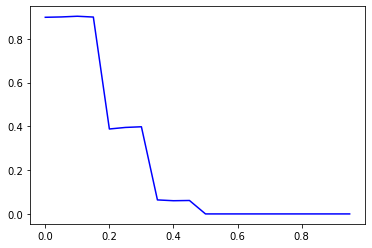

In [47]:
import random
import numpy as np
import matplotlib.pyplot as plt

# function to convert to subscript
def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)

# This method borrowed from: https://github.com/niuers/Learning-From-Data-A-Short-Course/blob/master/Solutions%20to%20Chapter%201%20The%20Learning%20Problem.ipynb
# Props to him for figuring this out because my original method for doing this was much slower
def flip_coins(total_coins):
    """Flip all coins once, return their head/tail status"""

    hts = np.zeros(total_coins) #head: 1, tail: 0
    probs = np.random.uniform(size=total_coins)
    hts[probs > 0.5] = 1
    return hts

epsilons = np.arange(0, 1, .05)
NUM_RUNS = 6
NUM_EXPERIMENTS = 10000
plot = []

# My one line monstrosity.
# flip_coins(NUM_RUNS) = flip the coin NUM_RUNS times (6) per the question. This is just one of the coins
# np.average(flip_coins(NUM_RUNS)) = get the average result over the 6 coins
# np.abs(np.average(flip_coins(NUM_RUNS)) - .5) = Get the absolute value of v-u
# np.maximum(np.abs(np.average(flip_coins(NUM_RUNS)) - .5), np.abs(np.average(flip_coins(NUM_RUNS)) - .5)) = Find the
# maximum between the two coins
# sum(1 for i in range(0, NUM_EXPERIMENTS) if do all the stuff in the above NUM_EXPERIMENTS number of times. If the
# result is greater than epsilon then 1 otherwise 0. Add all those 0s and 1s up and then divide by NUM_EXPERIMENTS
# to get the average.
for epsilon in epsilons:
    plot.append(sum(1 for i in range(0, NUM_EXPERIMENTS) if np.maximum(np.abs(np.average(flip_coins(NUM_RUNS)) - .5), np.abs(np.average(flip_coins(NUM_RUNS)) - .5)) > epsilon) / NUM_EXPERIMENTS)

ax = plt.subplot()
ax.plot(epsilons, plot, color='blue', markersize=8, label='Hoeffding Bound')